In [452]:
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
import warnings
warnings.simplefilter('ignore')

_Імпортуємо датасет_

In [453]:
df = datasets.load_wine()
y = df.target

In [332]:
def cf_metrics(dataset,labels,y):
    print(f'Homogenity: {metrics.homogeneity_score(y,labels):.3F}')
    print(f'Completeness: {metrics.completeness_score(y,labels):.3F}')
    print(f'V_measure: {metrics.v_measure_score(y,labels):.3F}')
    print(f'Adjusted_rand: {metrics.adjusted_rand_score(y,labels):.3F}')
    print(f'Adjusted_mutual: {metrics.adjusted_mutual_info_score(y,labels):.3F}')
    print(f'Silhouette: {metrics.silhouette_score(dataset.data, labels):.3F}')

# KMeans

_Згідно з тренеровочним дата сетом маємо 3 категорії елементів, тому в параметрах виставляємо 3 кластера_

In [333]:
model = KMeans(n_clusters=3)

In [334]:
model.fit(df.data)

KMeans(n_clusters=3)

In [454]:
labels = model.labels_
labels

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

_Вираховуємо метрики_

In [336]:
cf_metrics(df, labels, y)

Homogenity: 0.429
Completeness: 0.429
V_measure: 0.429
Adjusted_rand: 0.371
Adjusted_mutual: 0.423
Silhouette: 0.571


_Робимо предикцію та будуємо графік_

In [337]:
predictions = model.predict(df.data)
predictions

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

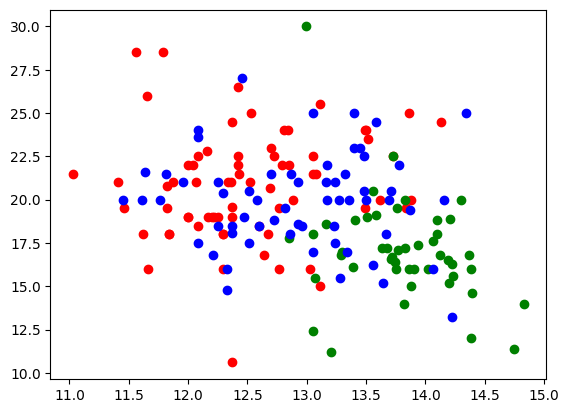

In [456]:
claster_0 = df.data[predictions==0]
claster_1 = df.data[predictions==1]
claster_2 = df.data[predictions==2]
plt.scatter(claster_0[:,0], claster_0[0:,3], color = 'red')
plt.scatter(claster_1[:,0], claster_1[0:,3], color = 'green')
plt.scatter(claster_2[:,0], claster_2[0:,3], color = 'blue')

__Висновок: Як бачимо модель поділила на 3 кластера, але є дуже не чіткою, оскільки немає чіткого поділу на кластери та всі елементи є перемішані__

# DBSCAN

In [457]:
dbscan = DBSCAN(eps=0.5)

In [458]:
dbscan.fit(df.data)

DBSCAN()

In [459]:
labels_db = dbscan.labels_
labels_db

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [460]:
pca = PCA(n_components=2).fit(df.data)
pca_2d = pca.transform(df.data)


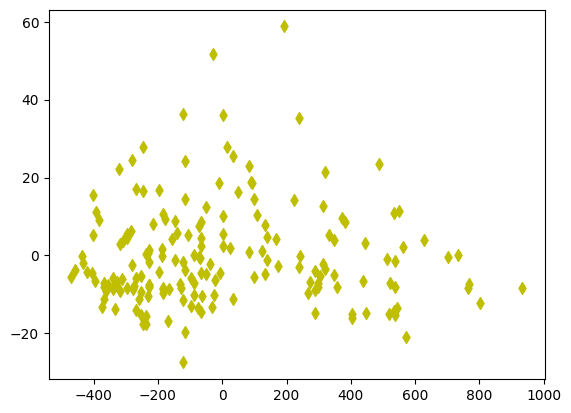

In [461]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] ==0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="r", marker='+')
    elif dbscan.labels_[i] ==1:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="g", marker='o')
    elif dbscan.labels_[i] ==2:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="b", marker='*')
    elif dbscan.labels_[i] ==3:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="k", marker='.')
    elif dbscan.labels_[i] ==-1:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="y", marker='d')

___Усі точки даних тепер жовтого кольору, що означає, що вони розглядаються як шум. Це тому, що значення епсилона дуже мале і ми не оптимізували параметри. Тому нам потрібно знайти значення епсілону і minPoints, а потім знову тренувати нашу модель.___

_Для епсілону я використовую граф K-відстані. Для побудови K-віддаленого графіка нам потрібна відстань між точкою та найближчою точкою даних для всіх точок даних у наборі даних. Ми отримуємо це за допомогою NearestNeighbors з sklearn.neighbors._

In [429]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df.data)
distances, indices = nbrs.kneighbors(df.data)

_Побудуємо наш K-графік відстані і знайдемо значення епсілону._

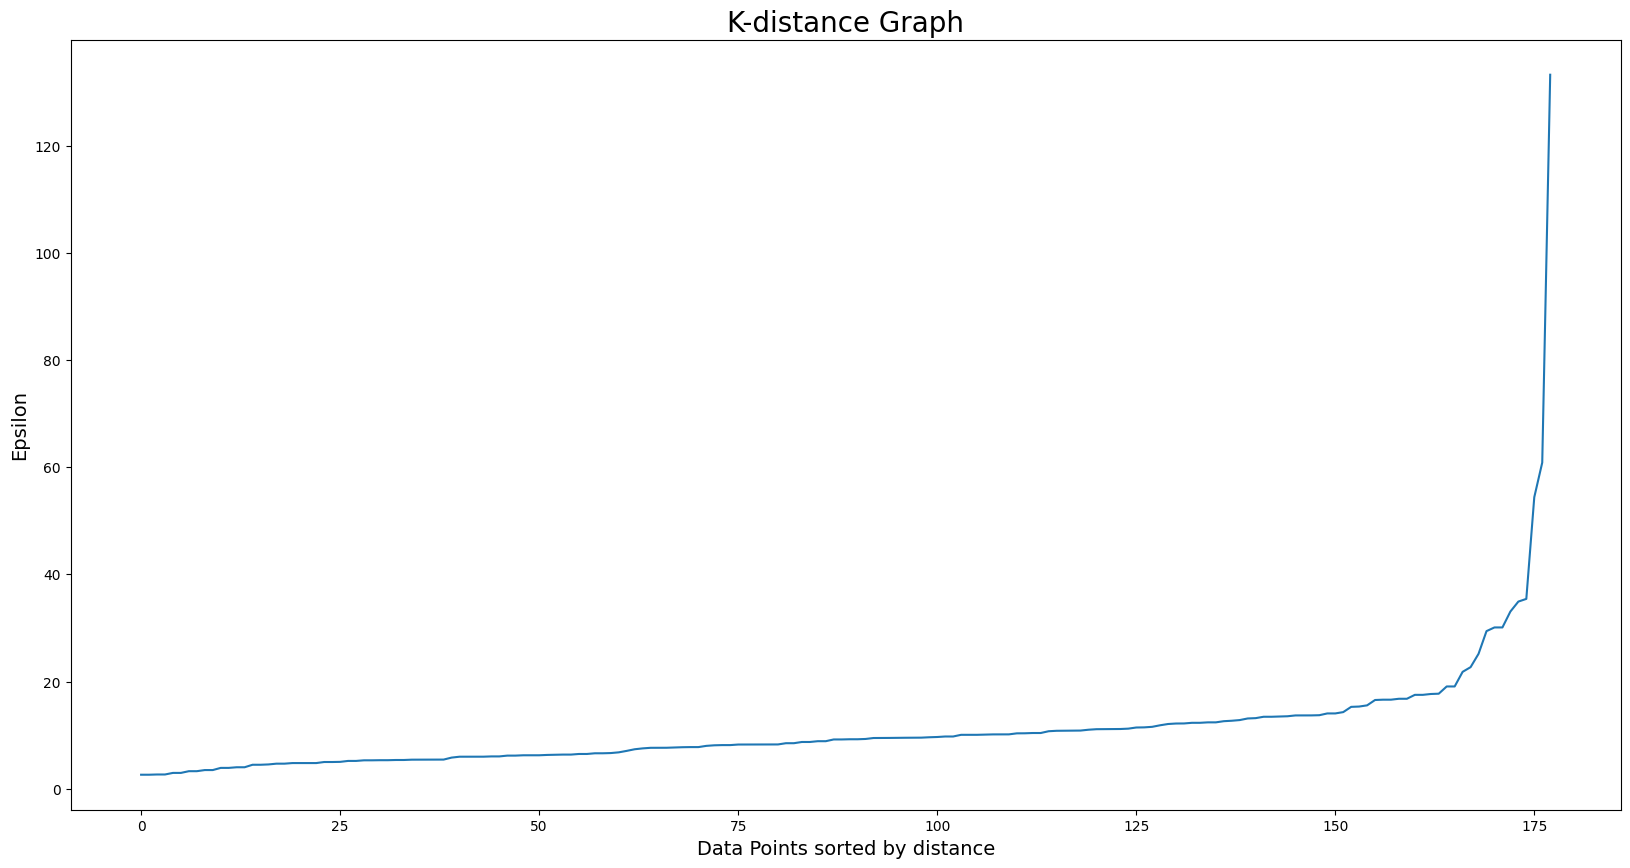

In [430]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

_Оптимальне значення епсилона знаходиться в точці максимальної кривизни в графі K-відстані, яка в даному випадку дорівнює 37._

In [462]:
dbscan = DBSCAN(eps=37)

In [463]:
dbscan.fit(df.data)

DBSCAN(eps=37)

In [464]:
labels_db = dbscan.labels_
labels_db

array([ 0,  0, -1, -1,  1, -1,  2,  2,  0,  0, -1,  2,  2,  0, -1,  2,  2,
        0, -1,  1,  1,  1,  0,  0,  1,  1, -1,  2,  1,  0,  2, -1,  0,  2,
        0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  0,  0,  2,  0,
        2, -1, -1,  0,  0,  0,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

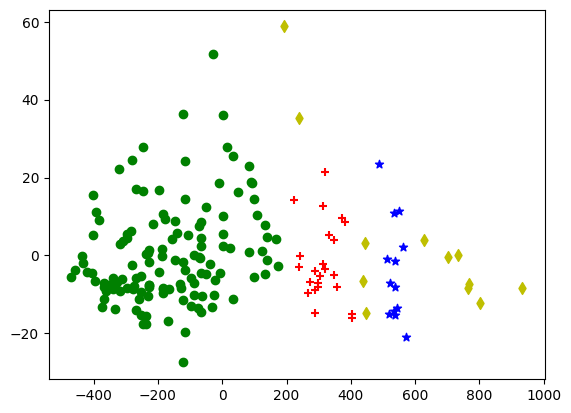

In [465]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] ==0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="r", marker='+')
    elif dbscan.labels_[i] ==1:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="g", marker='o')
    elif dbscan.labels_[i] ==2:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="b", marker='*')
    elif dbscan.labels_[i] ==3:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="k", marker='.')
    elif dbscan.labels_[i] ==-1:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="y", marker='d')

In [451]:
cf_metrics(df, labels_db, y)

Homogenity: 0.344
Completeness: 0.431
V_measure: 0.382
Adjusted_rand: 0.235
Adjusted_mutual: 0.371
Silhouette: 0.525


___Бачимо що при підборі рпимально значення епсілона, модель чітко поділила на 3 кластрера та відокремила шум___

# Hierarchical Clustering

_Модель побудована на основі ієрархічній кластеризації_

In [350]:
mergining = linkage(df.data, method="complete")

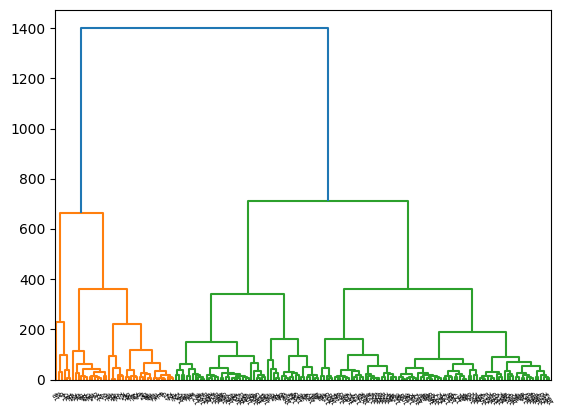

In [351]:
clusters  = dendrogram(mergining, leaf_rotation=120)